<a href="https://colab.research.google.com/github/ShauryaGupta18/ShauryaGupta18/blob/main/finalmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#For calculating daily_low
#Data ka load and prep
df = pd.read_csv("Bullish Horizons Train.csv")
#Date conversion
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by='Date').set_index('Date')

TARGET_COL = 'low'

#Feature Selection- for bahut correlated data - keeping the zaruris
# highly correlated columns hata do{also, they point to the same thing}
price_cols_to_drop = ['open', 'high', 'close', 'adjclose']
df = df.drop(columns=price_cols_to_drop)

# Feature Engineering- Kum correlated hote hai , give more info
# Creating lagged features for the past 1 and 2 days (t-1, t-2)
lags = [1, 2]
for col in [TARGET_COL, 'volume']:
    for lag in lags:
        df[f'{col}lag{lag}'] = df[col].shift(lag)

#Feature Engineering: Calendar Features
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

# Data Finalization
# Drop the original 'volume' and the rows with NaNs created by the shift/lag operation.
df_model = df.drop(columns=['volume']).dropna()

#Create feature matrix (X) and target vector (Y)
X = df_model.drop(columns=[TARGET_COL])
Y = df_model[TARGET_COL]

#Data div karna hai into train and test
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
Y_train, Y_test = Y[:split_point], Y[split_point:]

#Model Training (Random Forest Regressor)
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10, # Limiting depth overfitting rokta hai
    random_state=42
)
rf_model.fit(X_train, Y_train)

#Evaluation
Y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
mse = (mean_squared_error(Y_test, Y_pred))


print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.4f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse:.4f}")
print(f"R-squared (R2) on Test Set: {r2:.4f}")


Root Mean Squared Error (RMSE) on Test Set: 3.6764
Mean Squared Error (MSE) on Test Set: 13.5162
R-squared (R2) on Test Set: 0.9431


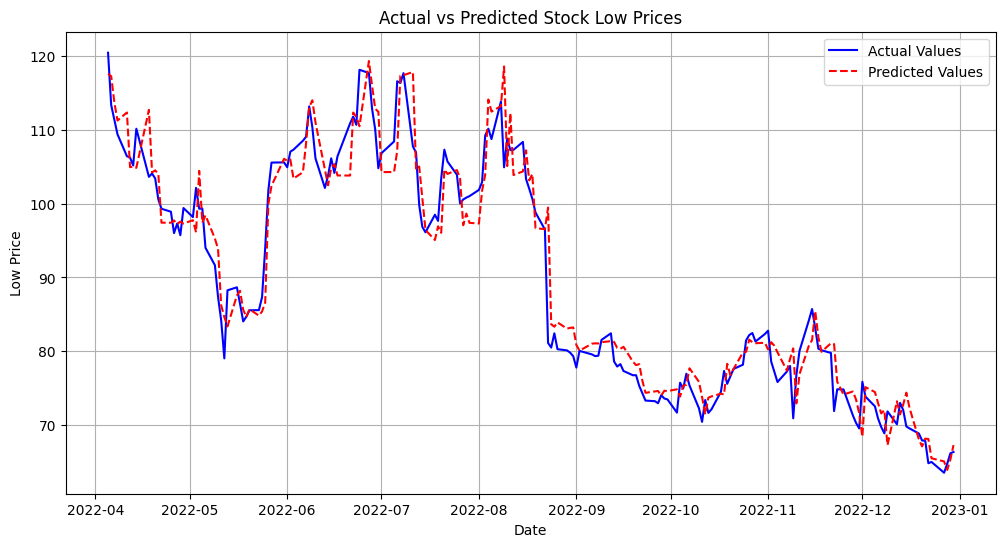

In [7]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test.index, Y_test, label="Actual Values", color="blue")
plt.plot(Y_test.index, Y_pred, label="Predicted Values", color="red", linestyle="--")

plt.title("Actual vs Predicted Stock Low Prices")
plt.xlabel("Date")
plt.ylabel("Low Price")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the data and initial preparation
df = pd.read_csv("Bullish Horizons Train.csv")
# Convert Date and set as index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by='Date').set_index('Date')

# Define the target variable (Y)
TARGET_COL = 'high'

# 2. Feature Selection / Dimensionality Reduction
# Drop the highly correlated raw price columns
price_cols_to_drop = ['open', 'low', 'close', 'adjclose']
df = df.drop(columns=price_cols_to_drop)

# 3. Feature Engineering: Lagged Features
# Creating lagged features for the past 1 and 2 days (t-1, t-2)
lags = [1, 2]
for col in [TARGET_COL, 'volume']:
    for lag in lags:
        df[f'{col}lag{lag}'] = df[col].shift(lag)

# 4. Feature Engineering: Calendar Features
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

# 5. Data Finalization
# Drop the original 'volume' and the rows with NaNs created by the shift/lag operation.
df_model = df.drop(columns=['volume']).dropna()

# Create feature matrix (X) and target vector (Y)
X = df_model.drop(columns=[TARGET_COL])
Y = df_model[TARGET_COL]

# 6. Time-Series Split (80% Train, 20% Test)
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
Y_train, Y_test = Y[:split_point], Y[split_point:]

# 7. Model Training (Random Forest Regressor)
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10, # Limiting depth helps control overfitting
    random_state=42
)
rf_model.fit(X_train, Y_train)

# 8. Evaluation (for demonstration)
Y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mse = (mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.4f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse:.4f}")
print(f"R-squared (R2) on Test Set: {r2:.4f}")


Root Mean Squared Error (RMSE) on Test Set: 3.7136
Mean Squared Error (MSE) on Test Set: 13.7912
R-squared (R2) on Test Set: 0.9511


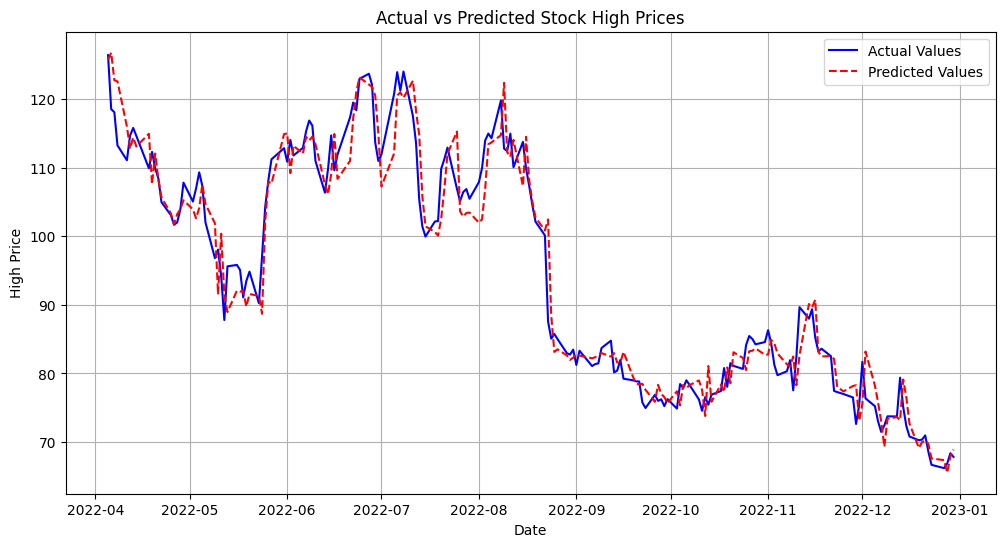

In [9]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test.index, Y_test, label="Actual Values", color="blue")
plt.plot(Y_test.index, Y_pred, label="Predicted Values", color="red", linestyle="--")

plt.title("Actual vs Predicted Stock High Prices")
plt.xlabel("Date")
plt.ylabel("High Price")
plt.legend()
plt.grid(True)
plt.show()